In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from functools import wraps

In [2]:
# Define the timing decorator
def timing_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Method '{func.__name__}' executed in {elapsed_time:.4f} seconds.")
        return result
    return wrapper

In [32]:
# SalesDataProcessor class
class SalesDataProcessor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    @timing_decorator
    def load_data(self):
        """Load the sales data from a CSV file."""
        self.data = pd.read_csv(self.file_path)
        
        print("Data loaded successfully.")
        print(self.data.head().to_string(index=False))

    @timing_decorator
    def summarize_data(self):
        """Summarize the sales data."""
        summary = self.data.describe()
        
        return summary

    @timing_decorator
    def plot_sales_over_time(self):
        """Plot sales over time."""
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        sales_over_time = self.data.groupby('Date')['Total'].sum()
        sales_over_time.plot(figsize=(10, 6), title='Total Sales Over Time', ylabel='Total Sales')
        plt.grid(True)
        plt.show()

In [33]:
if __name__ == '__main__':
    # Initialize the processor with the dataset path
    processor = SalesDataProcessor('./supermarket_sales - Sheet1.csv')

    # Load data
    processor.load_data()

   

Data loaded successfully.
 Invoice ID Branch      City Customer type Gender           Product line  Unit price  Quantity  Tax 5%    Total      Date  Time     Payment   cogs  gross margin percentage  gross income  Rating
750-67-8428      A    Yangon        Member Female      Health and beauty       74.69         7 26.1415 548.9715  1/5/2019 13:08     Ewallet 522.83                 4.761905       26.1415     9.1
226-31-3081      C Naypyitaw        Normal Female Electronic accessories       15.28         5  3.8200  80.2200  3/8/2019 10:29        Cash  76.40                 4.761905        3.8200     9.6
631-41-3108      A    Yangon        Normal   Male     Home and lifestyle       46.33         7 16.2155 340.5255  3/3/2019 13:23 Credit card 324.31                 4.761905       16.2155     7.4
123-19-1176      A    Yangon        Member   Male      Health and beauty       58.22         8 23.2880 489.0480 1/27/2019 20:33     Ewallet 465.76                 4.761905       23.2880     8.4
373-

In [34]:
 # Summarize data
processor.summarize_data()

    

Method 'summarize_data' executed in 0.0211 seconds.


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


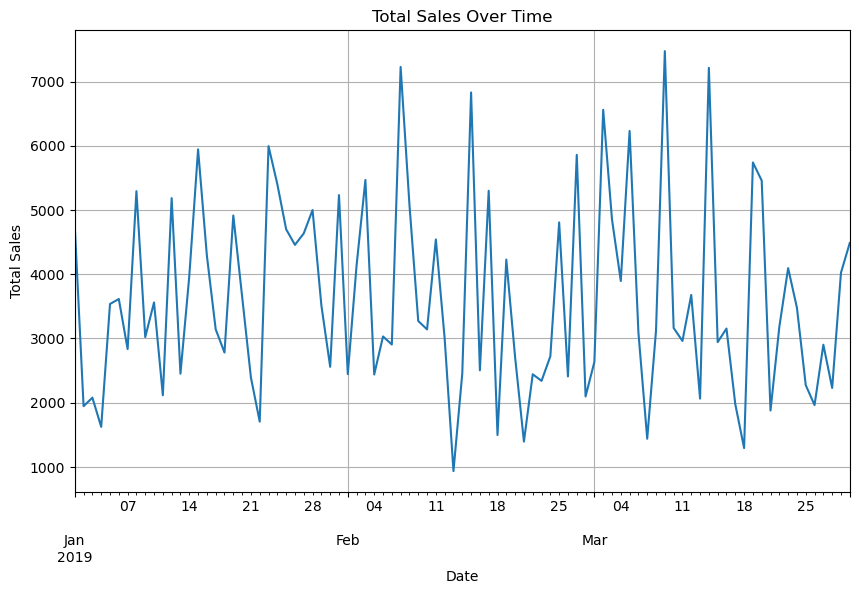

Method 'plot_sales_over_time' executed in 0.5064 seconds.


In [35]:
# Plot sales over time
processor.plot_sales_over_time()